In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("zepto.xlsx")

In [3]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [6]:
df.describe()

,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,quantity
count,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000,3732.000000
mean,15680.117899,7.617095,4.008574,14192.834941,387.843783,213.270900
std,16088.807618,9.211733,2.203511,13850.726265,678.096509,194.730976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,0.000000,2.000000,5500.000000,100.000000,50.000000
50%,11000.000000,6.000000,5.000000,10400.000000,225.000000,186.000000
75%,20000.000000,10.000000,6.000000,18400.000000,450.000000,340.000000
max,260000.000000,51.000000,6.000000,139900.000000,10000.000000,1500.000000


In [10]:
df.shape

(3732, 9)

## Checking Missing Data

In [14]:
df.isnull().sum()

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

### Removing Duplicates

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3727    False
3728    False
3729    False
3730    False
3731    False
Length: 3732, dtype: bool

In [18]:
df.duplicated().sum()

np.int64(2)

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.duplicated().sum()

np.int64(0)

## Convert Data Types

In [27]:
df['outOfStock'] = df['outOfStock'].astype(bool)
df['discountPercent'] = df['discountPercent'].astype(float)
df['mrp'] = df['mrp'].astype(float)
df['discountedSellingPrice'] = df['discountedSellingPrice'].astype(float)

### Creating new metrices

In [35]:
df['discountAmount'] = df['mrp'] - df['discountedSellingPrice']

In [36]:
df['discountRatio'] = df['discountAmount'] / df['mrp']

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730 entries, 0 to 3731
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                3730 non-null   object 
 1   name                    3730 non-null   object 
 2   mrp                     3730 non-null   float64
 3   discountPercent         3730 non-null   float64
 4   availableQuantity       3730 non-null   int64  
 5   discountedSellingPrice  3730 non-null   float64
 6   weightInGms             3730 non-null   int64  
 7   outOfStock              3730 non-null   bool   
 8   quantity                3730 non-null   int64  
 9   discountAmount          3730 non-null   float64
 10  discountRatio           3729 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 324.2+ KB


## EDA (Exploratory Data Analysis)

#### Category-wise Product Distribution

In [39]:
category_count = df['Category'].value_counts()
category_count

Category
Cooking Essentials       514
Munchies                 514
Packaged Food            388
Ice Cream & Desserts     388
Chocolates & Candies     388
Paan Corner              343
Personal Care            343
Home & Cleaning          194
Biscuits                 147
Dairy, Bread & Batter    129
Beverages                129
Health & Hygiene          97
Fruits & Vegetables       93
Meats, Fish & Eggs        63
Name: count, dtype: int64

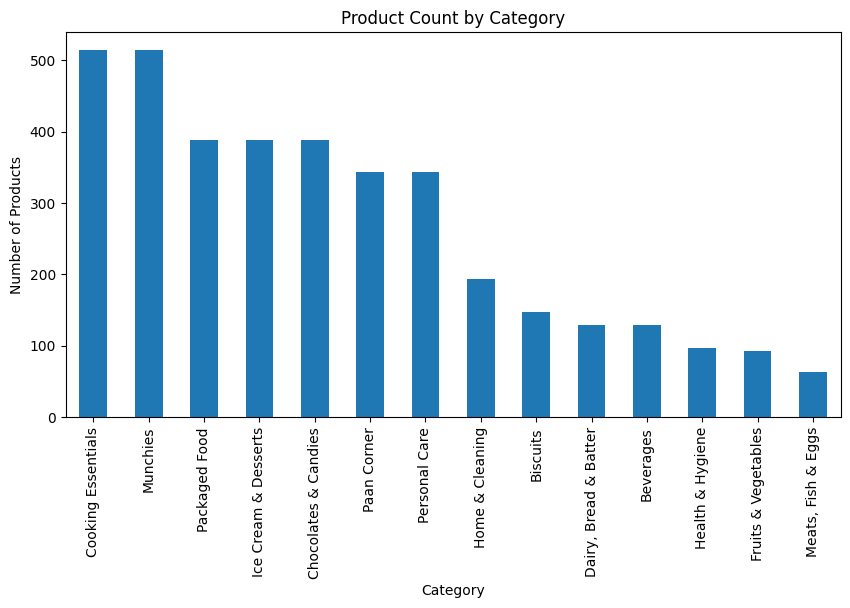

In [41]:
# Bar Chart
plt.figure(figsize=(10,5))
category_count.plot(kind='bar')
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

### Discount Analysis by Category

In [42]:
avg_discount = df.groupby('Category')['discountPercent'].mean().sort_values(ascending=False)
avg_discount

Category
Fruits & Vegetables      15.462366
Meats, Fish & Eggs       11.031746
Ice Cream & Desserts      8.324742
Packaged Food             8.324742
Chocolates & Candies      8.324742
Biscuits                  8.244898
Health & Hygiene          8.051546
Munchies                  7.163424
Cooking Essentials        7.163424
Beverages                 7.155039
Dairy, Bread & Batter     7.155039
Paan Corner               6.239067
Personal Care             6.239067
Home & Cleaning           5.675258
Name: discountPercent, dtype: float64

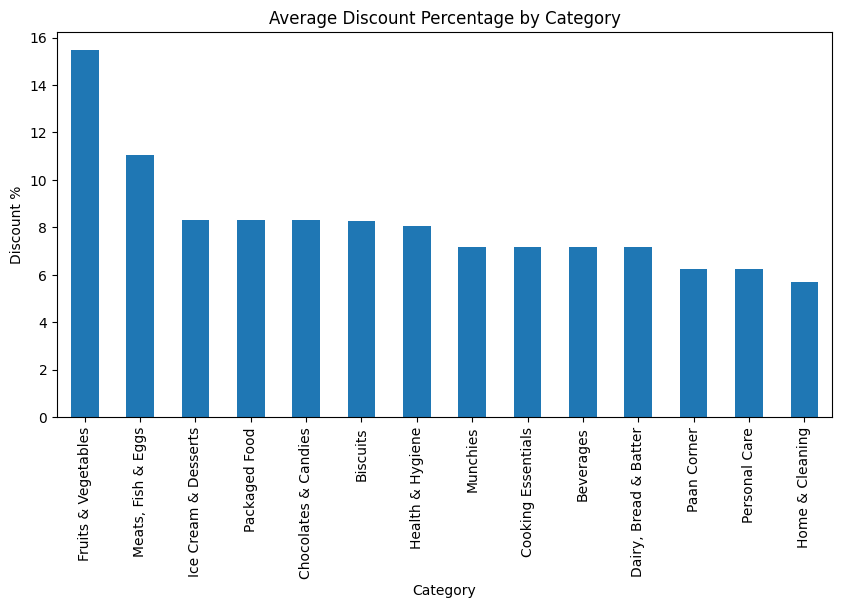

In [44]:
# Bar Chart
plt.figure(figsize=(10,5))
avg_discount.plot(kind='bar')
plt.title("Average Discount Percentage by Category")
plt.ylabel("Discount %")
plt.show()

### Pricing Analysis (MRP vs Selling Price)

In [45]:
df[['mrp', 'discountedSellingPrice']].describe()

,mrp,discountedSellingPrice
count,3730.000000,3730.000000
mean,15680.482574,14193.206434
std,16093.113838,13854.430798
min,0.000000,0.000000
25%,6000.000000,5500.000000
50%,11000.000000,10400.000000
75%,20000.000000,18400.000000
max,260000.000000,139900.000000


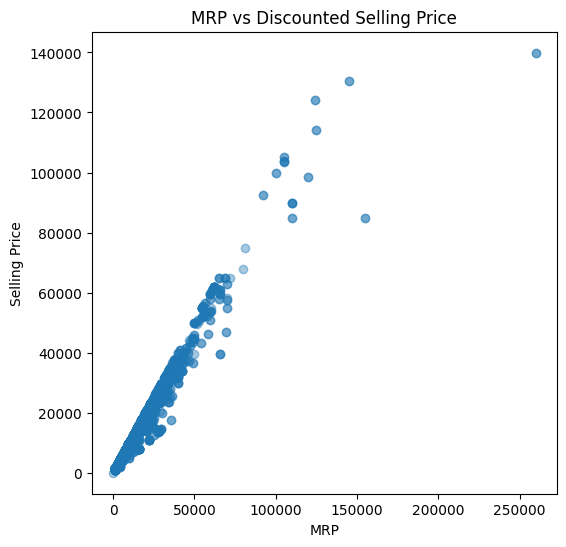

In [47]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(df['mrp'], df['discountedSellingPrice'], alpha=0.4)
plt.xlabel("MRP")
plt.ylabel("Selling Price")
plt.title("MRP vs Discounted Selling Price")
plt.show()

### Inventory Availability Analysis

##### Low Stock Products

In [51]:
low_stock = df[df['availableQuantity'] <= 2]
low_stock[['name', 'Category', 'availableQuantity']]

,name,Category,availableQuantity
67,Pomegranate Peeled,Fruits & Vegetables,2
78,Banana Leaf,Fruits & Vegetables,2
79,Sponge Gourd,Fruits & Vegetables,2
81,Safal Frozen - Mixed Vegetables,Fruits & Vegetables,2
87,Carrot,Fruits & Vegetables,0
...,...,...,...
3727,Stayfree Secure Dry Cover Extra Large Sanitary...,Health & Hygiene,0
3728,Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup,Health & Hygiene,0
3729,Whisper Bindazzz Night Sanitary Pads XL Plus,Health & Hygiene,0
3730,Fine Life Cotton Balls,Health & Hygiene,0


#### High Stock Availabilty

In [50]:
high_stock = df[df['availableQuantity'] > 2]
high_stock[['name', 'Category', 'availableQuantity']]

,name,Category,availableQuantity
0,Onion,Fruits & Vegetables,3
1,Tomato Hybrid,Fruits & Vegetables,3
2,Tender Coconut,Fruits & Vegetables,3
3,Coriander Leaves,Fruits & Vegetables,3
4,Ladies Finger,Fruits & Vegetables,3
...,...,...,...
3708,Organic India Organic Chyawanprash,Health & Hygiene,6
3709,Organic India Sugar Balance 60 Capsules Bottle,Health & Hygiene,6
3712,Vicks BabyRub,Health & Hygiene,6
3716,Dabur Nature Care Isabgol - Double Action,Health & Hygiene,6


## Out-of-Stock Analysis

#### Category-wise Stock-Out Percentage

In [52]:
out_stock_rate = df.groupby('Category')['outOfStock'].mean().sort_values(ascending=False)
out_stock_rate

Category
Biscuits                 0.285714
Beverages                0.217054
Dairy, Bread & Batter    0.217054
Meats, Fish & Eggs       0.190476
Health & Hygiene         0.134021
Cooking Essentials       0.124514
Munchies                 0.124514
Chocolates & Candies     0.115979
Packaged Food            0.115979
Ice Cream & Desserts     0.115979
Home & Cleaning          0.097938
Fruits & Vegetables      0.064516
Paan Corner              0.061224
Personal Care            0.061224
Name: outOfStock, dtype: float64

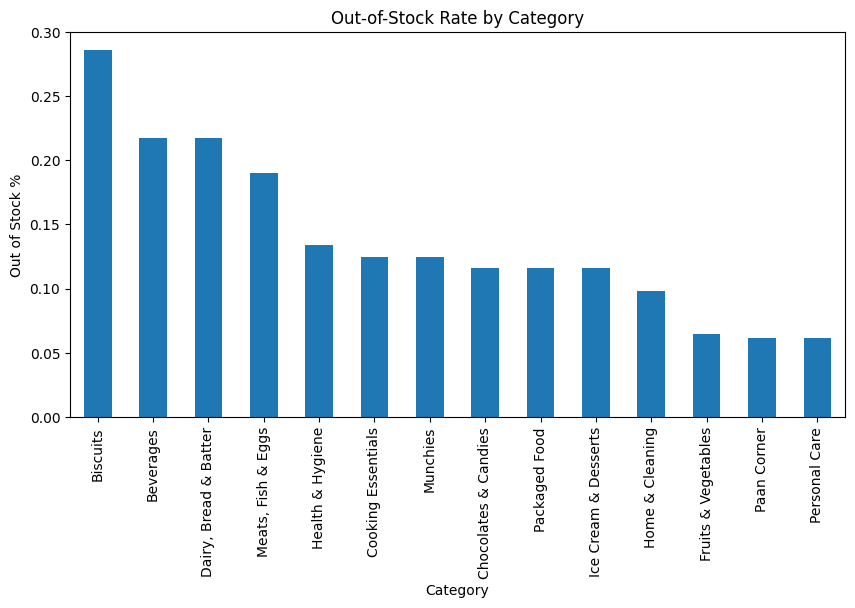

In [54]:
# Bar Chart
plt.figure(figsize=(10,5))
out_stock_rate.plot(kind='bar')
plt.title("Out-of-Stock Rate by Category")
plt.ylabel("Out of Stock %")
plt.show()

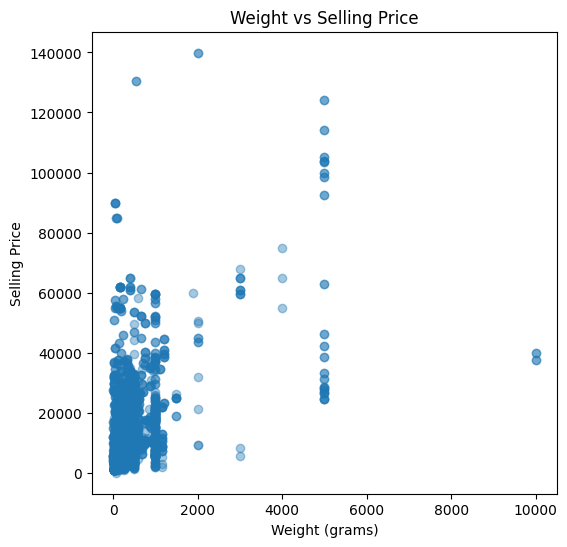

In [55]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(df['weightInGms'], df['discountedSellingPrice'], alpha=0.4)
plt.xlabel("Weight (grams)")
plt.ylabel("Selling Price")
plt.title("Weight vs Selling Price")
plt.show()